## Retails Sales Analysis

#### Required Library

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

Load Data 

In [6]:
Retails = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Retails_Store\retail_store_sales.csv")

In [7]:
# Read sample 15 rows 
Retails.sample(15)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
2733,TXN_1512224,CUST_21,Electric household essentials,Item_2_EHE,6.5,8.0,52.0,Digital Wallet,Online,26-11-2023,True
11592,TXN_7790991,CUST_25,Milk Products,Item_4_MILK,9.5,5.0,47.5,Credit Card,Online,13-03-2024,True
10155,TXN_3478143,CUST_08,Patisserie,Item_20_PAT,33.5,9.0,301.5,Cash,Online,12-08-2022,False
8368,TXN_6380866,CUST_22,Computers and electric accessories,NaN,41.0,NaN,NaN,Credit Card,In-store,29-05-2024,False
4876,TXN_8182879,CUST_10,Electric household essentials,Item_15_EHE,26.0,5.0,130.0,Cash,Online,07-05-2023,False
12446,TXN_9422597,CUST_04,Milk Products,Item_2_MILK,6.5,9.0,58.5,Cash,Online,08-04-2024,False
11974,TXN_8011504,CUST_20,Patisserie,Item_17_PAT,29.0,8.0,232.0,Cash,In-store,24-07-2024,False
5069,TXN_2587564,CUST_24,Food,Item_18_FOOD,30.5,7.0,213.5,Credit Card,Online,30-07-2024,NaN
11580,TXN_9702142,CUST_20,Electric household essentials,Item_11_EHE,20.0,10.0,200.0,Credit Card,Online,03-05-2022,NaN
4433,TXN_5509504,CUST_02,Furniture,NaN,NaN,4.0,74.0,Digital Wallet,Online,20-06-2023,True


#### Data Cleaning & Preparation


In [8]:
# Shape of Data 
Retails.shape

(12575, 11)

In [9]:
# Information of Data 
Retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [10]:
# summary statistics
Retails.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [11]:
for col in Retails.columns:
    print(Retails[col].value_counts())
    print("---"*50)

Transaction ID
TXN_6867343    1
TXN_3731986    1
TXN_9303719    1
TXN_9458126    1
TXN_4575373    1
              ..
TXN_9347481    1
TXN_4009414    1
TXN_5306010    1
TXN_5167298    1
TXN_2407494    1
Name: count, Length: 12575, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Customer ID
CUST_05    544
CUST_24    543
CUST_13    534
CUST_08    533
CUST_09    519
CUST_15    519
CUST_16    515
CUST_23    513
CUST_20    507
CUST_18    507
CUST_01    507
CUST_11    503
CUST_10    501
CUST_22    501
CUST_21    498
CUST_12    498
CUST_07    491
CUST_02    488
CUST_17    487
CUST_19    487
CUST_14    484
CUST_06    481
CUST_25    476
CUST_04    474
CUST_03    465
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Category
Electric household essentials    

In [12]:
for col in Retails.columns:
    print(Retails[col].unique())
    print("---"*50)

['TXN_6867343' 'TXN_3731986' 'TXN_9303719' ... 'TXN_5306010' 'TXN_5167298'
 'TXN_2407494']
------------------------------------------------------------------------------------------------------------------------------------------------------
['CUST_09' 'CUST_22' 'CUST_02' 'CUST_06' 'CUST_05' 'CUST_07' 'CUST_21'
 'CUST_23' 'CUST_25' 'CUST_14' 'CUST_15' 'CUST_17' 'CUST_01' 'CUST_10'
 'CUST_04' 'CUST_13' 'CUST_18' 'CUST_08' 'CUST_20' 'CUST_12' 'CUST_11'
 'CUST_19' 'CUST_16' 'CUST_24' 'CUST_03']
------------------------------------------------------------------------------------------------------------------------------------------------------
['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric household essentials' 'Computers and electric accessories']
------------------------------------------------------------------------------------------------------------------------------------------------------
['Item_10_PAT' 'Item_17_MILK' 'Item_12_BUT' 'Item_16_BEV' 

In [13]:
# duplicate rows summary
print('Duplicate Rows Count:', Retails[Retails.duplicated()].shape[0])

Duplicate Rows Count: 0


In [14]:
# Mising Values
Null_Summary = pd.DataFrame({"Num_of_Null":Retails.isna().sum(),"Percentage of Null": (Retails.isna().sum()/len(Retails)*100).round(2)})
Null_Summary

,Num_of_Null,Percentage of Null
Transaction ID,0,0.00
Customer ID,0,0.00
Category,0,0.00
Item,1213,9.65
Price Per Unit,609,4.84
Quantity,604,4.80
Total Spent,604,4.80
Payment Method,0,0.00
Location,0,0.00
Transaction Date,0,0.00


In [15]:
# Make a copy to keep original data safe
Retails_clean = Retails.copy()

In [16]:
# Rename Columns
Retails_clean.columns = Retails_clean.columns.str.replace(" ", "_")

In [17]:
# Change boolen to String
Retails_clean["Discount_Applied"] = (
    Retails_clean["Discount_Applied"]
    .fillna("Unknown")
    .astype(str)
)



In [18]:
# Handling Categorical  Missing values
Cat_columns =  Retails_clean.select_dtypes("object")
for col in Cat_columns:
    Retails_clean[col].fillna(Retails_clean[col].mode()[0],inplace=True)
    

In [19]:
# Handling Numerical Missing Values
Retails_clean["Quantity"].fillna(Retails_clean["Quantity"].median(),inplace=True)
Retails_clean["Price_Per_Unit"].fillna(
Retails_clean["Total_Spent"]/Retails_clean["Quantity"],inplace=True)
Retails_clean["Total_Spent"].fillna(
Retails_clean["Quantity"]*Retails_clean["Price_Per_Unit"],inplace=True   
)


In [20]:
# Handing Data column
Retails_clean["Transaction_Date"] = pd.to_datetime(Retails_clean["Transaction_Date"],format= "mixed")

In [21]:
Retails_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    12575 non-null  object        
 1   Customer_ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price_Per_Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total_Spent       12575 non-null  float64       
 7   Payment_Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction_Date  12575 non-null  datetime64[ns]
 10  Discount_Applied  12575 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


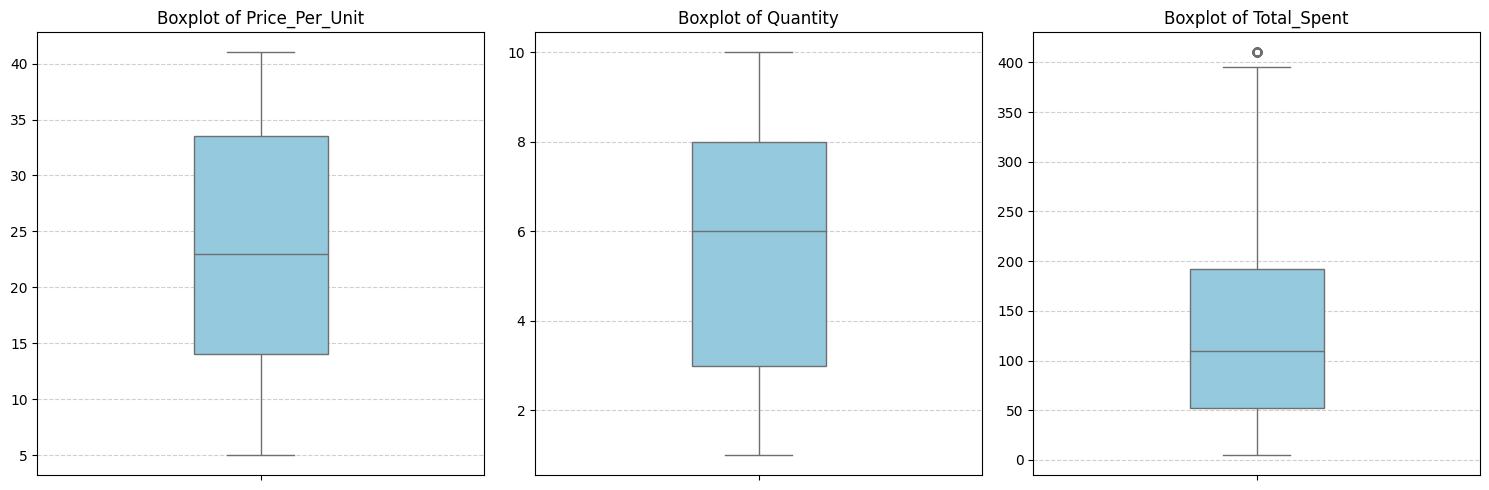

In [22]:
# Check Outlier 
cols = ["Price_Per_Unit", "Quantity","Total_Spent"]
plt.figure(figsize=(15,5))
for i, col in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=Retails_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()    

#### Export Clean Data in DataBase

In [23]:
import urllib.parse
from sqlalchemy import create_engine
import time 
username = "root"
raw_password = "ANku7970@!#"
password = urllib.parse.quote_plus(raw_password)

host = "localhost"
port = 3306
database = "Retail_Analysis"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

try:
   print("Attempting to connect to database...")
   for x in range(1,4):
      print(x)
      time.sleep(1)
   Retails_clean.to_sql("Retails_clean",engine,
   if_exists="replace",index=False)
   print("Connected ✅ Data Loaded Successfully") 

except Exception as e:
   print("Not Connected❌")
   print("Reson",e)


Attempting to connect to database...
1
2
3
Connected ✅ Data Loaded Successfully


#### Exploratory Data Analysis & Visualization

In [24]:
# Set theme for Visualization
sns.set_theme(style="dark")

In [25]:
Retails_clean.describe()

,Price_Per_Unit,Quantity,Total_Spent,Transaction_Date
count,12575.000000,12575.000000,12575.000000,12575
mean,23.369304,5.558648,130.208111,2023-07-15 00:59:05.320079360
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,52.000000,2022-10-03 00:00:00
50%,23.000000,6.000000,110.000000,2023-07-16 00:00:00
75%,33.500000,8.000000,192.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-12-01 00:00:00
std,10.748728,2.790160,93.580667,NaN


In [26]:
Retails_clean.describe(include="object")

,Transaction_ID,Customer_ID,Category,Item,Payment_Method,Location,Discount_Applied
count,12575,12575,12575,12575,12575,12575,12575
unique,12575,25,8,200,3,2,3
top,TXN_6867343,CUST_05,Electric household essentials,Item_2_BEV,Cash,Online,True
freq,1,544,1591,1339,4310,6354,4219


<Axes: >

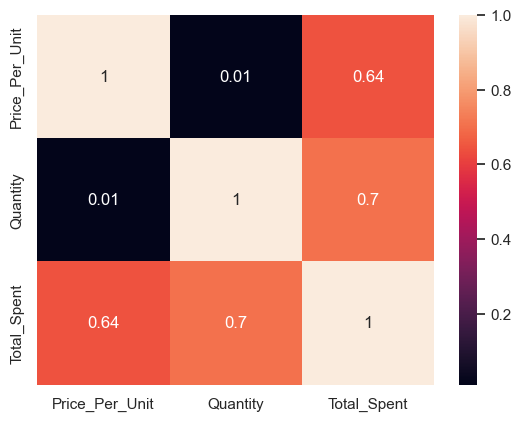

In [27]:
# Correlation with numerical column
Num_Col =  Retails_clean.select_dtypes("float64")
sns.heatmap(Num_Col.corr(),annot=True)


## Insights
**1. Price_Per_Unit vs Quantity (Correlation ≈ 0.01)**
- There is almost no correlation between price per unit and quantity purchased.
- This indicates that customers do not significantly change the quantity they buy based on unit price.
- Buying behavior appears price-independent in terms of quantity.

**2. Price_Per_Unit vs Total_Spent (Correlation ≈ 0.64)**
- A moderate positive correlation exists between price per unit and total spending.
- Higher-priced items naturally contribute to higher total transaction value.
- Unit price plays an important role in driving revenue.

**3. Quantity vs Total_Spent (Correlation ≈ 0.70)**
- Quantity has a strong positive relationship with total spending.
- As the number of items purchased increases, total sales increase significantly.
- Quantity is a key driver of revenue growth.

**Distribution of Numerical Columns**

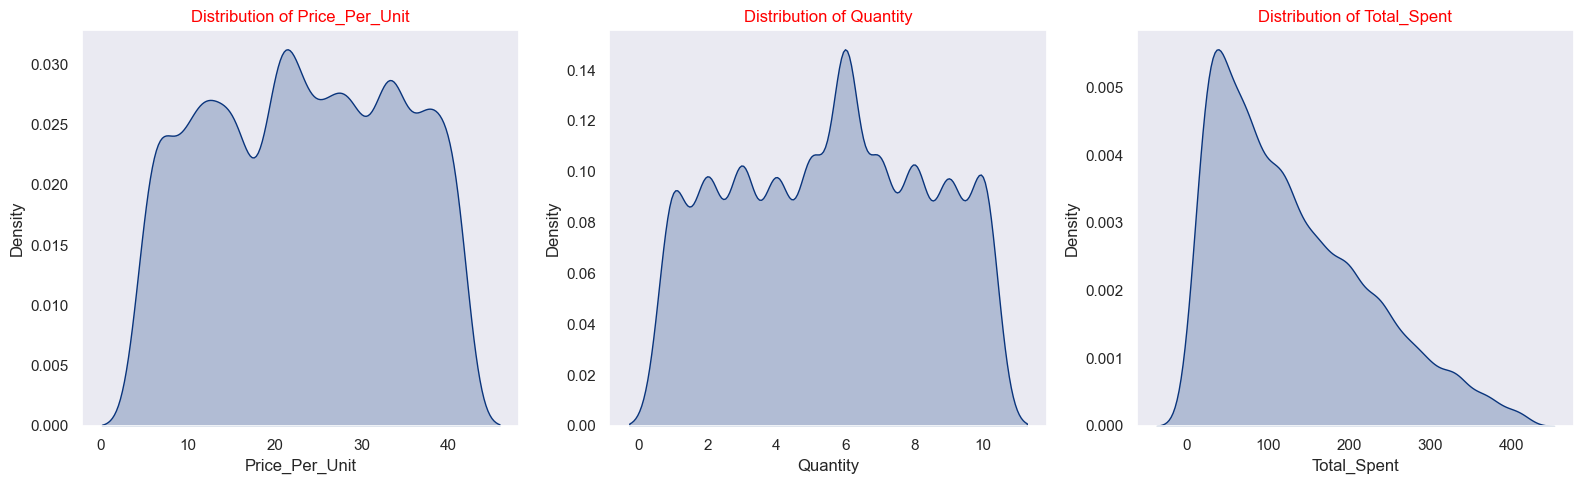

In [28]:
plt.figure(figsize=(16,5))
for x ,col in enumerate(Num_Col):
    plt.subplot(1,3,x+1)
    sns.kdeplot(x = col, fill=True,data= Retails_clean,color="#09347c")
    plt.title(f"Distribution of {col}",color  = "Red")
plt.tight_layout()
plt.show()


## Insights:
**1 Distribution of Price_Per_Unit**
- Prices are fairly evenly distributed across the range.
- No extreme skewness or abnormal spikes are observed.
- This suggests a balanced product pricing strategy across categories.

**2. Distribution of Quantity**
- Quantity shows a central concentration around mid-range values (around 5–6 units).
- Extremely low or very high quantities are less frequent.
- This indicates typical customer purchases involve moderate quantities.

**3. Distribution of Total_Spent**
- The distribution is right-skewed.
- Most transactions have low to medium total spending, while a few high-value transactions exist.
- These high-value transactions create a long tail in the distribution.

**General Analysis**
* What is the total revenue generated?
* What is the total number of transactions?
* What is the average revenue per transaction?
* What is the total quantity sold?

In [29]:
Total_Revenue = np.sum(Retails_clean["Total_Spent"])
Total_Transaction = Retails_clean["Transaction_ID"].count()
Avg_Revenue_Per_Trans = Total_Revenue/Total_Transaction
Total_QTY = np.sum(Retails_clean["Quantity"])


print("--------------------------------General Analysis---------------------------")
print(f"Total Rvenue: {Total_Revenue}")
print(f"Total Transaction: {Total_Transaction}")
print(f"Avg Revenue Per Transaction: {round(Avg_Revenue_Per_Trans,2)}")
print(f"Total Quantity: {Total_QTY}")
print("---------------------------------------------------------------------------")

--------------------------------General Analysis---------------------------
Total Rvenue: 1637367.0
Total Transaction: 12575
Avg Revenue Per Transaction: 130.21
Total Quantity: 69900.0
---------------------------------------------------------------------------


**Categorical Analysis**

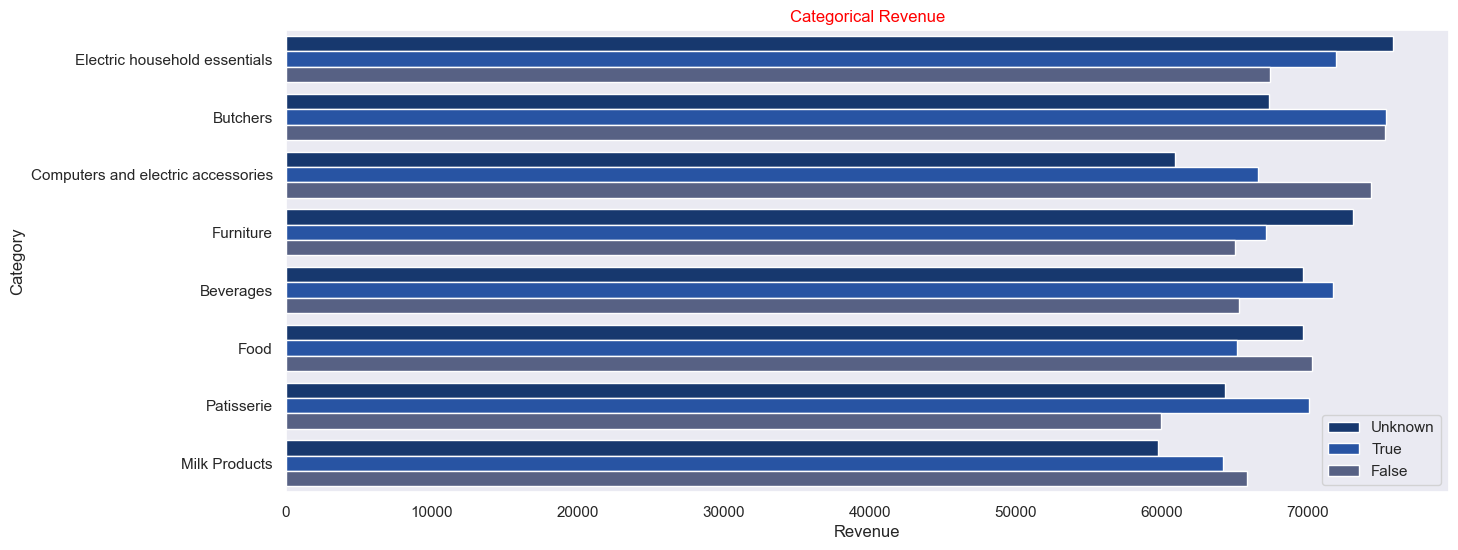

In [30]:
Cate_Revenue = pd.read_sql_query("Select Category, Discount_Applied, sum(Total_Spent) as Revenue " \
"from Retails_Clean group by Category , Discount_Applied order by Revenue desc",engine)
plt.figure(figsize=(15,6))
sns.barplot(y = "Category", x = "Revenue", hue="Discount_Applied",data=Cate_Revenue,palette= ["#09347c","#134eb7","#4f5d8c"])
plt.title("Categorical Revenue",color = "Red")
plt.legend()
plt.show()

## Insights
- Electric household essentials, Butchers, and Beverages generate the highest revenue across categories.
- Discount-applied sales generally show higher or comparable revenue, indicating discounts help boost overall spending.
- Categories like Milk Products and Patisserie contribute moderate but stable revenue, showing consistent deman.

**Item Analysis**

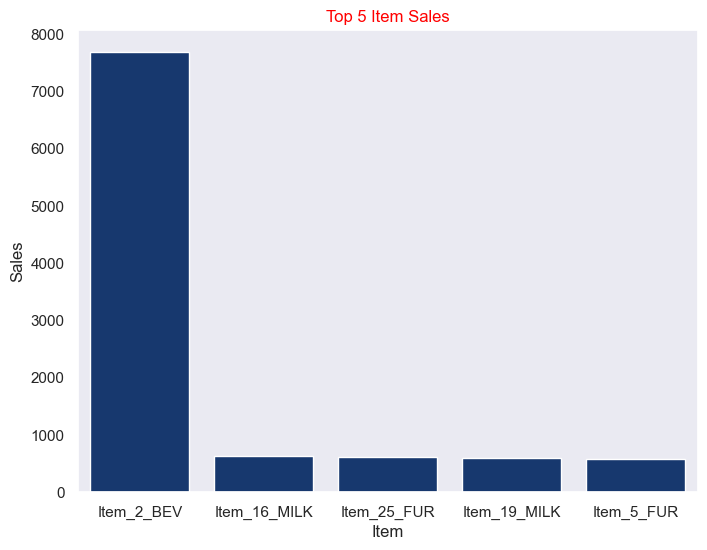

In [31]:
Item_Sales = pd.read_sql("Select Item, sum(Quantity) as Sales" \
" from Retails_Clean group by Item order by Sales desc limit 5",engine)
plt.figure(figsize=(8,6))
sns.barplot(x = "Item", y = "Sales", data=Item_Sales, color="#09347c")
plt.title("Top 5 Item Sales",color = "Red")
plt.show()

## Insights
- Item_2_BEV is the top-selling product by quantity, showing very high customer demand.
- There is a large gap between Item_2_BEV and other top items, indicating sales concentration on one product.
- Beverage and Milk categories dominate the top sales, highlighting daily-use items as key revenue drivers

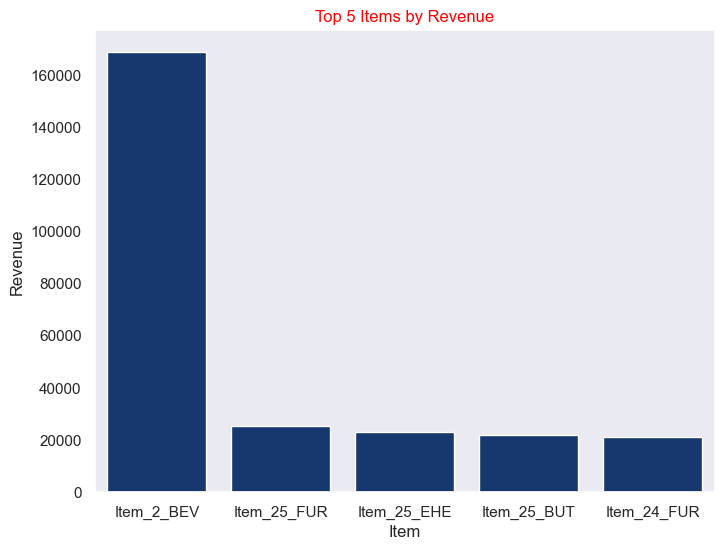

In [32]:
Item_Revenue =pd.read_sql(" Select Item , sum(Total_Spent) as Revenue from Retails_Clean group by Item order by Revenue desc limit 5",engine)
plt.figure(figsize=(8,6))
sns.barplot(x = "Item", y = "Revenue", data=Item_Revenue,color="#09347c")
plt.title("Top 5 Items by Revenue", color = "Red")
plt.show()

## Insights
- Item_2_BEV generates the highest revenue by a large margin, making it the top revenue-driving product.
- The remaining top items contribute significantly lower but similar revenue, indicating revenue concentration on one key item.
- This suggests that high demand combined with strong pricing/volume makes Item_2_BEV the most valuable product.

**Payment Methods**

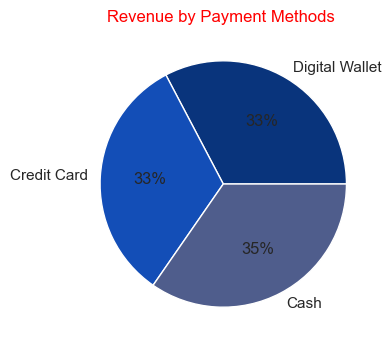

In [33]:
Payment_Revenue = pd.read_sql_query("Select Payment_Method, sum(Total_Spent) " \
"as Revenue from Retails_Clean group by Payment_Method", engine)
plt.figure(figsize=(6,4))
plt.pie(Payment_Revenue["Revenue"], labels= Payment_Revenue["Payment_Method"],
autopct= "%1.0f%%",colors= ["#09347c","#134eb7","#4f5d8c"])
plt.title("Revenue by Payment Methods ", color = "red")
plt.show()

## Insights 
- Cash contributes the highest share of total revenue, making it the most preferred payment method.
- Credit Card and Digital Wallet revenues are almost equal, showing balanced adoption of digital payments.
- Despite digital options, cash remains dominant in overall customer transactions. 

**Location Revenue**

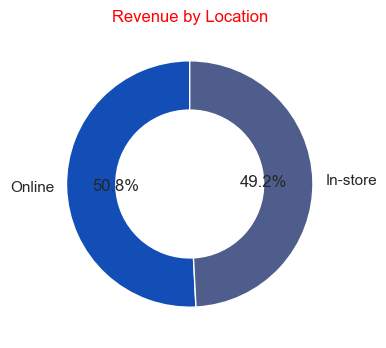

In [34]:
Location_Revenue = pd.read_sql_query("Select Location, sum(Total_Spent) as Revenue " \
"from Retails_clean group by Location",engine)
plt.figure(figsize=(7,4))
plt.title("Revenue by Location", color ="Red")
plt.pie(Location_Revenue["Revenue"], labels=Location_Revenue["Location"],
 colors=["#134eb7","#4f5d8c"],autopct="%1.1f%%",
 wedgeprops={"width":0.4},startangle=90)
plt.show()

## Insights
- Online sales generate slightly higher revenue than in-store, though both contribute almost equally.
- Even this small difference is important, as it shows a growing shift toward online purchasing.
- Maintaining in-store performance while strengthening online channels can maximize total revenue.

**Yearly Revenue**

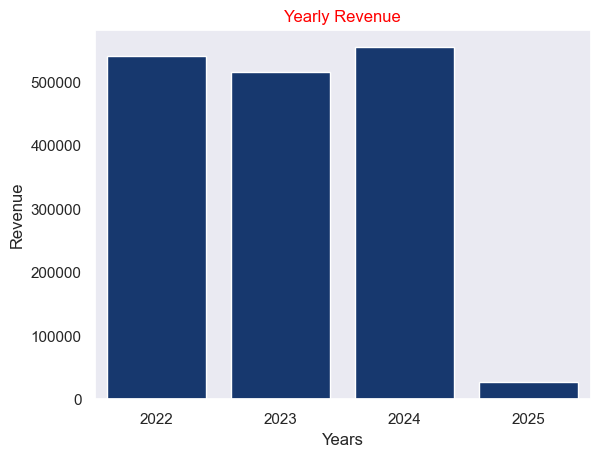

In [35]:
Year_Rev = pd.read_sql_query("Select Year(Transaction_Date) as Years , " \
"sum(Total_Spent) as Revenue from Retails_Clean group by Years", engine)
sns.barplot(x = "Years",y="Revenue",data=Year_Rev,color="#09347c")
plt.title("Yearly Revenue", color = "Red")
plt.show()

## Insights
- 2024 records the highest revenue, showing peak business performance.
- Revenue in 2022 and 2023 remains strong and stable, indicating consistent growth.
- 2025 revenue is low as it likely represents partial or ongoing year data.

**Monthly Revenue**

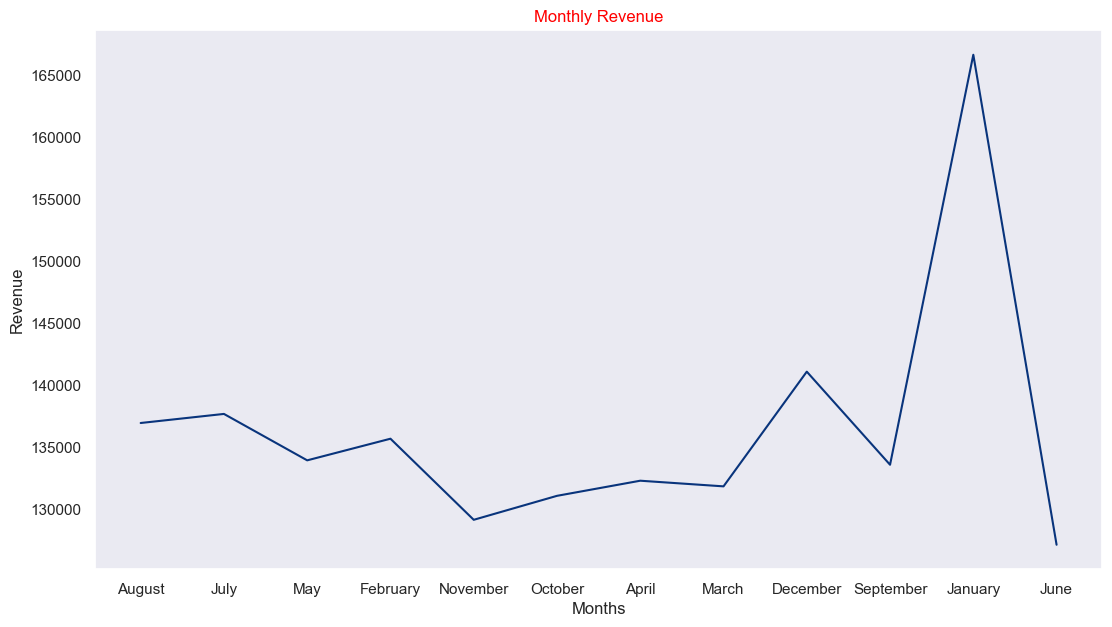

In [36]:
Monthly_Rev = pd.read_sql_query("Select MonthName(Transaction_Date) as Months, " \
"sum(Total_Spent) as Revenue from Retails_Clean group by Months", engine)
plt.figure(figsize=(13,7))
sns.lineplot(x = "Months", y = "Revenue", data = Monthly_Rev, color ="#09347c" )
plt.title("Monthly Revenue", color ="Red")
plt.show()

## Isights
- January records the highest revenue, indicating peak monthly performance.
- Revenue fluctuates across months, showing seasonal variation in customer spending.
- Lower revenue in some months suggests opportunities for targeted promotions during off-peak periods.

**Weekly Revenue**

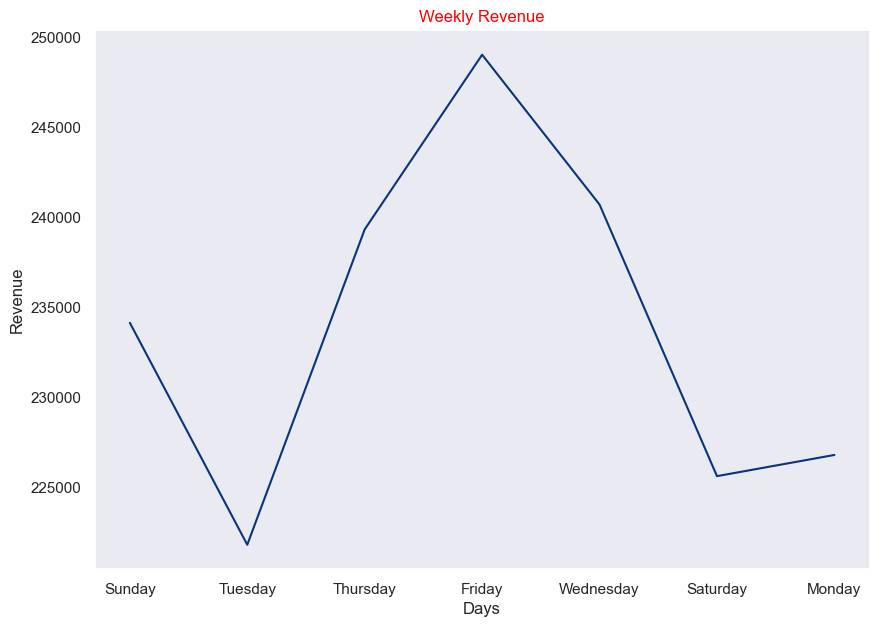

In [37]:
Weekly_Rev = pd.read_sql_query("Select DayName(Transaction_Date) as Days, " \
"sum(Total_Spent) as Revenue from Retails_Clean group by Days", engine)
plt.figure(figsize=(10,7))
sns.lineplot(x = "Days",y = "Revenue", data= Weekly_Rev, color = "#09347c" )
plt.title("Weekly Revenue", color = "Red")
plt.show()

## Insights
- Friday records the highest revenue, making it the strongest sales day of the week.
- Mid-week (Thursday–Friday) revenue is generally higher, indicating increased customer activity before weekends.
- Lower revenue on some days suggests scope for weekday-focused promotions.

**Customer Analysis**

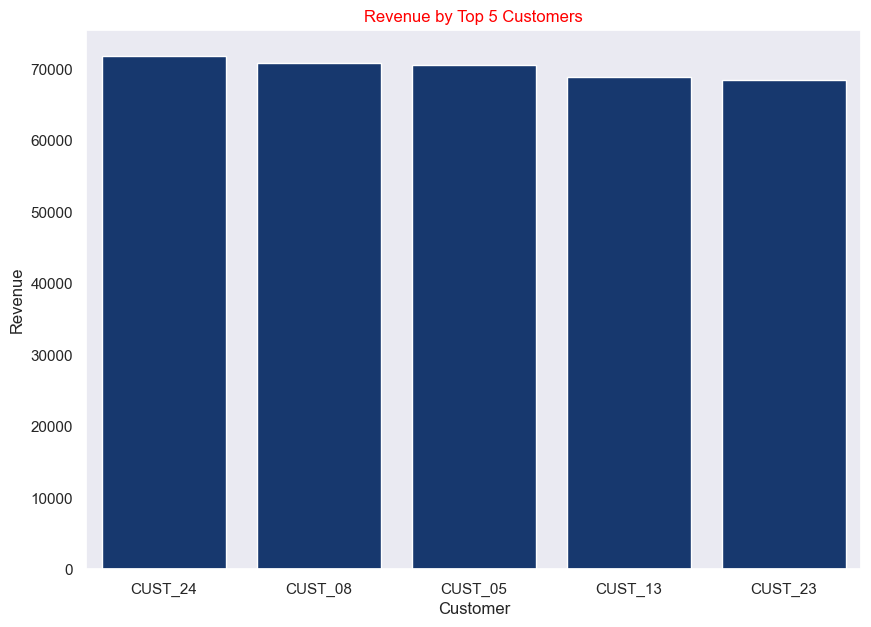

In [38]:
Customer = pd.read_sql_query("Select Customer_Id as Customer,sum(Total_Spent) as Revenue" \
" from Retails_clean group by Customer order by Revenue Desc limit 5",engine)
plt.figure(figsize=(10,7))
sns.barplot(x = "Customer", y = "Revenue", data= Customer, color="#09347c")
plt.title("Revenue by Top 5 Customers", color = "Red")
plt.show()

## Insights
- CUST_24 generates the highest revenue among the top 5 customers.
- Other top customers contribute similar but slightly lower revenue, showing a balanced high-value customer base.
- Retaining customers like CUST_24 is critical for sustaining overall revenue.